# Computational Homework #3

**Due by midnight on Wednesday February 10, 2021. Submit on Canvas**. Answer all of the following problems. These problems should be completed in this notebook (using the R kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 


## Problem #1

#### Load the ${\tt wine}$ dataset into R. This dataset is available in the ${\tt gamair}$ library. A description of the variables can be obtained [here](https://cran.r-project.org/web/packages/gamair/gamair.pdf).

In [3]:
install.packages('gamair')
library(gamair)

data(wine)

head(wine)

length(wine$h.temp)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,year,price,h.rain,s.temp,w.rain,h.temp,parker
,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,1952,37,160,17.1,600,14.3,NA
2,1953,63,80,16.7,690,17.3,NA
3,1954,12,180,15.4,430,16.8,NA
4,1955,45,130,17.1,502,16.8,NA
5,1956,15,140,15.6,440,17.2,NA
6,1957,22,110,16.1,420,16.2,NA


[1] 47

#### (a) Suppose that you'd like to conduct a hypothesis test at the $\alpha = 0.02$ level to decide whether the true mean temperature (C) at harvest is less than 18 degrees C. State the null and alternative hypotheses   (10 PTS) .

$H_0$ = The true mean tempearture is greater than $18^oC$ 

$H_A$ = The true mean temperature is less than $18^oC$

#### (b) Conduct the appropriate hypothesis test using the p-value method. Clearly state your conclusion. (10 PTS)

In [4]:
alpha = 0.02; cv = qnorm(1-alpha/2)
xbar = mean(wine$h.temp); 
s = sd(wine$h.temp);
n = length(wine$h.temp)
z = (xbar - 18)/(s/sqrt(n)); z
pvalue = pnorm(z); cat("The p-value is", pvalue, ".")

[1] -2.96456

The p-value is 0.001515579 .

In [5]:
xbar

[1] 17.4

After conducting a standard one tailed t-test we see that the p-value is less than $\alpha =0.02$ such that p < 0.02. Therefor we reject the null hypothesis and conclude the true mean temperature is less than $18^o C$ 

#### (c) Can you find a built in R function that does this computation automatically?  (5 PTS)

In [7]:
# no, so I wrote one...
z_test <- function(x,mu,s,n,tailed){
  z <- (x-mu)/(s/sqrt(n))
  if(tailed==1) return(cat('Zscore is ',z,'\np-value is', pnorm(-abs(z))))
  if(tailed==2) return(cat('Zscore is ',z,'\np-value is', 2*pnorm(-abs(z))))
}

## Problem #2

Let's consider a situation where our data, $X_1,...,X_n$ are randomly sampled from a normal distribution and we want to test a claim about the variance, $\sigma^2$. It turns out that if the population is normal, then
\begin{align*}
T = \frac{(n-1)S^2}{\sigma^2} \sim \chi^2(n-1).
\end{align*}
That is, the statistic $T$ has a "chi-squared distribution" with $n-1$ degrees of freedom. Don't worry if you've never seen this distribution before; you can learn a few things about it [here](https://en.wikipedia.org/wiki/Chi-squared_distribution). We can use $T$ to test claims about a population variance. In this exercise, let's consider testing $$H_0: \sigma^2 = 1 \,\,\, vs \,\,\, H_1: \sigma^2 > 1,$$ at the $\alpha = 0.05$ level. We're going to run simulations to understand the properties of the this test. First, we'll generate many samples under $H_0$. Then, we'll generate many samples under a particular value in $H_1$. 

#### (a) Generate $m = 1000$ samples of size $n = 10$ from a standard normal distribution. The result should be an $n$ by $m$ matrix (call it x0). Note: here, we are generating data under $H_0$  (10 PTS).

In [20]:
x0 = matrix(ncol = 1000, nrow = 10)
for(i in 1:1000){
  x0[,i] <- rnorm(10)
}
length(x0[,1])

[1] 10

#### (b) For each sample of size $n = 10$ (each column), calculate $T$, assuming that $H_0$ is true. The result should be a vector of length $m = 1000$. Print a density histogram of $T$, and overlay the pdf for $\chi^2(n-1)$ (use the lines() and dchisq() functions ). Does it appear that the distribution of $T$ follows the specified chi-squared distribution? (10 PTS)

In [28]:
t <- rep(0,1000)
for(i in 1:1000){
  x <- x0[,i]
  t[i] = (length(x)-1)*sd(x)^2
}

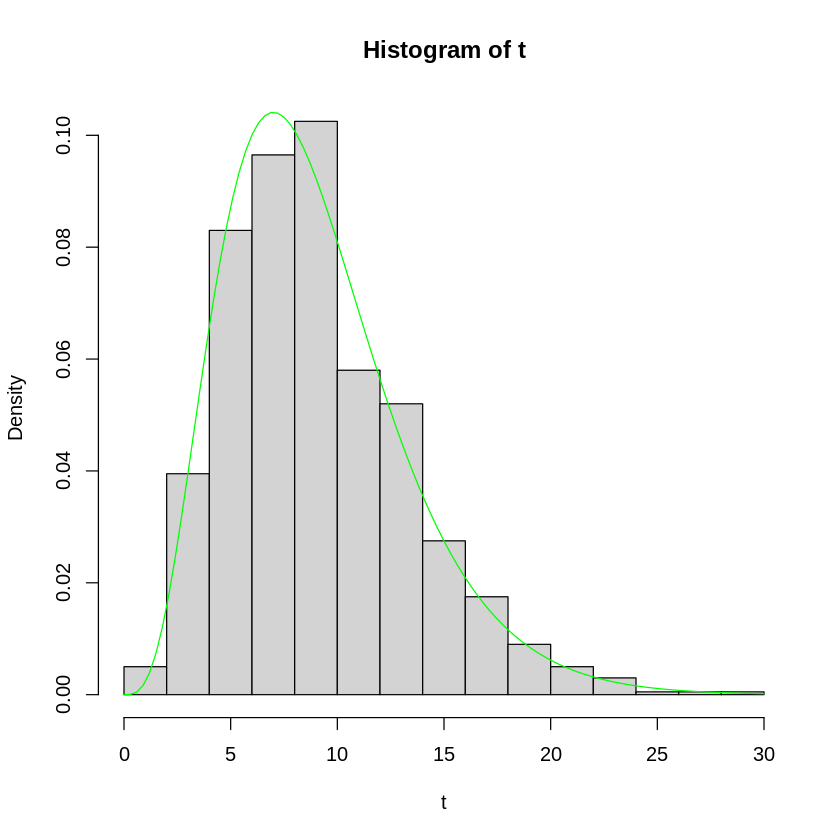

In [30]:
hist(t,prob=T)
x <- rchisq(10,df=9)
curve( dchisq(x, df=9), col='green', add=TRUE)

#### (c) Calculate the p-value for each value of $T$. Call the result pvalue. The p-value in this case will be the probability (calculated using the cdf of $\chi^2(n-1)$), that you get a test statistic at least as extreme (large) as the one you got, assuming $H_0$.  The result, pvalue, should be a vector of length $m$. Print a density histogram of these pvalue. Comment on the shape of the distribution. (15 PTS)

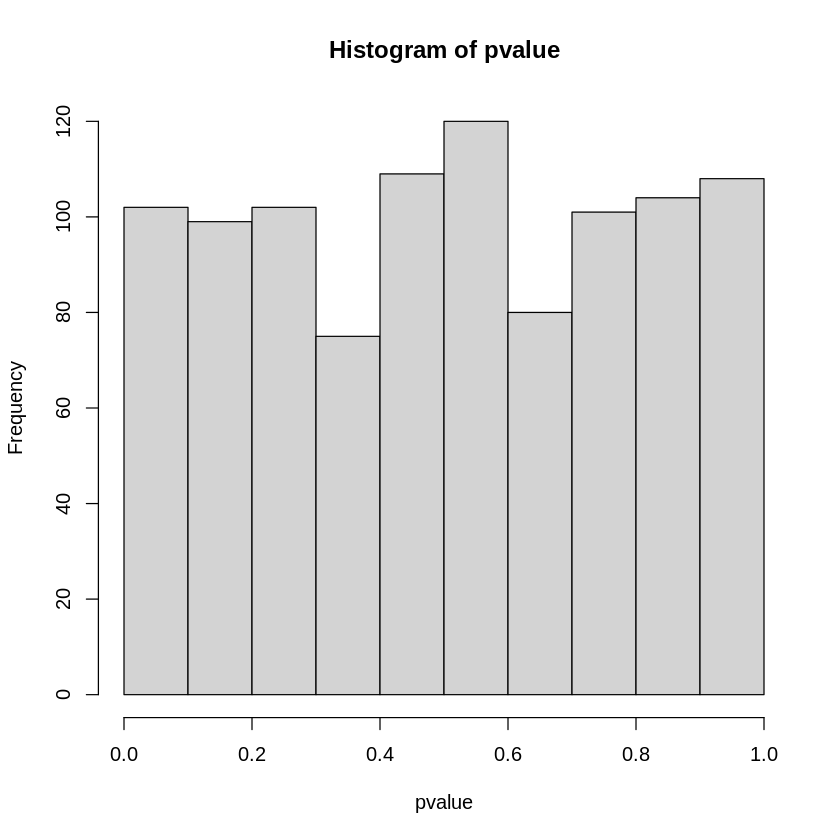

In [39]:
pvalue <- rep(0,1000)
for(i in 1:1000){
  pvalue[i] <- pchisq(t[i], df =9)
}
hist(pvalue)

The histogram of pvalue does not seem to take any noticable shape. The closest thing it resembels is a uniform distribution. Which makes sense statistically, as our $T$ statistic is repedeatly sampled under the null hypothesis and therefor should not be skewed to any side of the graph but rather uniformly distributed.

#### (d) Suppose that $\alpha = 0.05$, and we plan on rejecting $H_0$ when the p-value is less than $\alpha$. Use your result from part (c) to estimate the probability of type I error. Is your estimate close to the true probability of type I error? (10 PTS)

In [16]:
type1 <- rep(0,1000)
for(i in 1:1000){
  if(pvalue[i] <= 0.05) type1[i] <- 1
}
sum(type1)/length(type1)
#pretty dang close!

[1] 0.051

#### (e) Now, generate $m = 1000$ samples of size $n = 10$ from a $N(0,2)$. The result should be an $n$ by $m$ matrix (call it x1). Note: here, we are generating data under a particular value in $H_1$ (namely, $\sigma^2 = 2$). (10 PTS)

The goal for the remaining parts is to see what happens when the null is false, but we conduct a hypothesis test as usual (*assuming* the null is true).

In [2]:
x1 <- matrix(nrow=10,ncol=1000)
for(i in 1:1000){
  x1[,i] <- rnorm(10,mean=0,sd=sqrt(2))
}

#### (f) For each sample of size $n = 10$ (each column) in x1, calculate $T$, (again, assuming that $H_0$ is true). Call these new $T$'s T2. The result, T2, should be a vector of length $m = 1000$. Calculate the p-value for each value in T2 (again, assuming $H_0$); call the result pvalue2. Plot pvalue2 using a density histogram. (10 PTS)

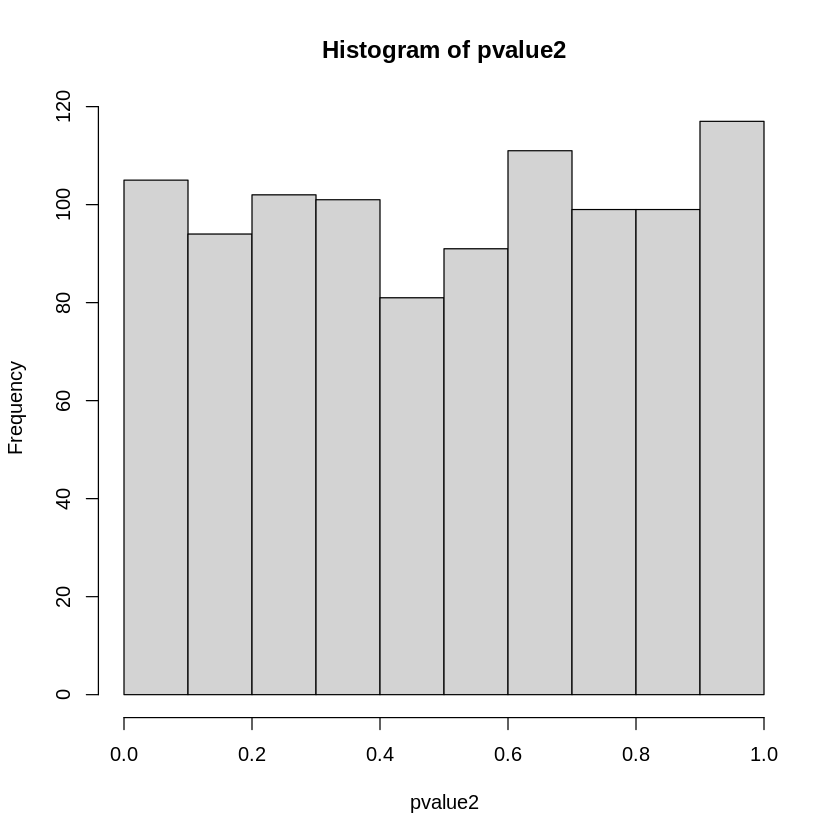

In [12]:
t2 <- rep(0,1000)
for(i in 1:1000){
  x <- x1[,i]
  t2[i] = ((length(x)-1)*sd(x)^2)/2
}
pvalue2 <- rep(0,1000)
for(i in 1:1000){
  pvalue2[i] <- pchisq(t2[i], df =9)
}
hist(pvalue2)

#### (g) Estimate the probability of type II error when $\sigma^2 = 2$. That is, estimate the probability that you fail to reject $H_0$ (i.e., that the pvalue is greater than $\alpha = 0.05$) when $H_1: \sigma^2 = 2$ is true. (5 PTS)

In [15]:
type2 <- rep(0,1000)
for(i in 1:1000){
  if(pvalue2[i] > 0.05) type2[i] <- 1
}
sum(type2)/length(type2)
# p > .05, fail to reject the null!!

[1] 0.949

#### (h) Interpret the result from part (g). What does this mean? Is this a good test procedure if the true value for $\sigma^2$ is 2? What might make the test more "powerful"? (5 PTS)

Due to p > 0.05, we reject to fail the null. Meaning the population variance $𝜎 ^2$ is not greater than 1 given the null hypothesis that $𝜎^2 = 1$. This is obvioulsy wrong, as we set our population variance to 2 during the second simulation. The reason this test failed is likely because we aimed to use the normal distribution in a sample of only 10 people. Which meant our degrees of freedom was a mere 9. To fix this problem we may have been better suited using a t-test.